In [264]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [265]:
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [266]:
df = df[["Country", "EdLevel", "YearsCodePro", "DevType", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,DevType,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end","Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, front-end","Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",23456.0


Data yang digunakan untuk memprediksi gaji adalah Country(Negara), EdLevel(Tingkat pendidikan), YearsCodePro(Berapa tahun pengalaman sebagai programer profesional), DevType(Jenis developer), Employment(Full time, part time, atau lainnya), ConvertedComp(Gaji yang dikonversikan ke US Dollar, jadi rename kolom ini menjadi Salary)

In [267]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,DevType,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end","Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, front-end","Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Developer, back-end","Employed, full-time",96828.0


Menghapus semua data yang tidak terdapat infornasi mengenai gaji(NaN)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   DevType       47904 non-null  object 
 4   Employment    48007 non-null  object 
 5   Salary        48019 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [269]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
DevType         0
Employment      0
Salary          0
dtype: int64

Menghapus baris dari DataFrame yang memiliki nilai null (NaN). df.isnull().sum() digunakan untuk menghitung jumlah nilai null dalam setiap kolom DataFrame

In [270]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39136 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39136 non-null  object 
 1   EdLevel       39136 non-null  object 
 2   YearsCodePro  39136 non-null  object 
 3   DevType       39136 non-null  object 
 4   Salary        39136 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


Data yang digunakan hanya data dimana status employment responden adalah full time

In [271]:
df['Country'].value_counts()

Country
United States of America                                10567
Germany                                                  3200
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

Jumlah data yang berasal dari setiap negara

In [272]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

Hapus semua data yang berasal dari negara yang hanya memiliki sedikit data karena jika misalnya kita menggunakan data dari San Guyana yang jumlahnya hanya 1, itu akan membingungkan model karena tidak bisa mempelajari apapun dari 1 data tersebut. Jika jumlah data lebih besar atau sama dengan nilai cutoff, maka data dari negara tersebut dipertahankan. Jika kurang, data tersebut digabungkan ke kategori baru yaitu "Other"

In [273]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10567
Other                                                    9276
Germany                                                  3200
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1453
Netherlands                                              1001
Australia                                                 985
Brazil                                                    972
Spain                                                     965
Sweden                                                    881
Italy                                                     826
Poland                                                    740
Switzerland                                               510
Denmark                                                   440


Nilai cutoff adalah 400, jadi data yang digunakan sekarang adalah data yang berasal dari negara yang jumlah datanya lebih besar atau sama dengan 400

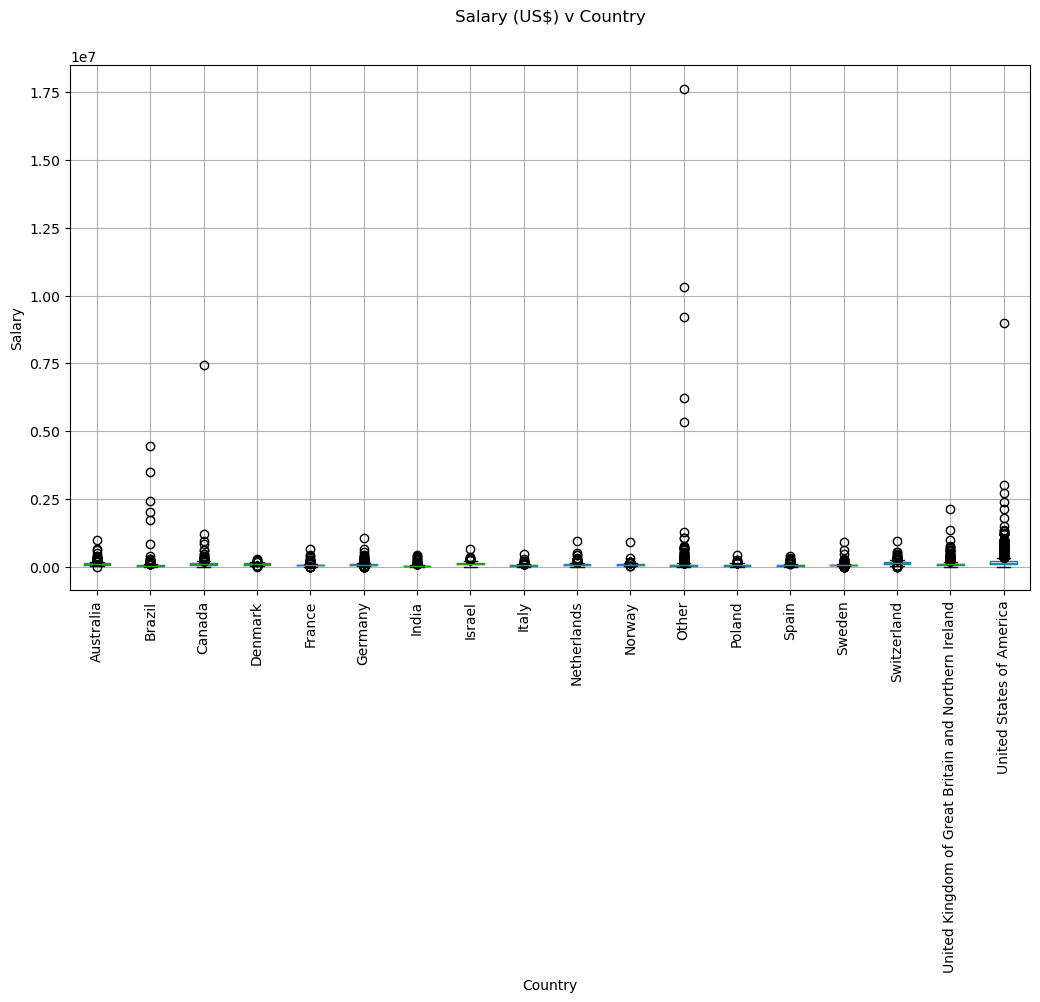

In [274]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

Rentang gaji yang ditampilkan berkisar dari 0 sampai 1,75 juta dollar. Dari plot diatas dapat dilihat bahwa terdapat banyak outliers (pencilan) dan tidak ada nilai median(area dimana terdapat banyak data) yang melebihi 0.25($250000)

In [275]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 5000]
df = df[df['Country'] != 'Other']

Data yang digunakan hanya data dengan gaji kurang dari 250000 Dollar dan lebih dari 5000 Dollar karena berdasarkan survey, seorang software developer seharusnya memiliki penghasilan lebih dari 5000 Dollar dalam setahun jika bekerja secara full time. Selanjutnya kategori "Other" dihapus karena terdapat banyak pencilan serta berasal dari berbagai negara

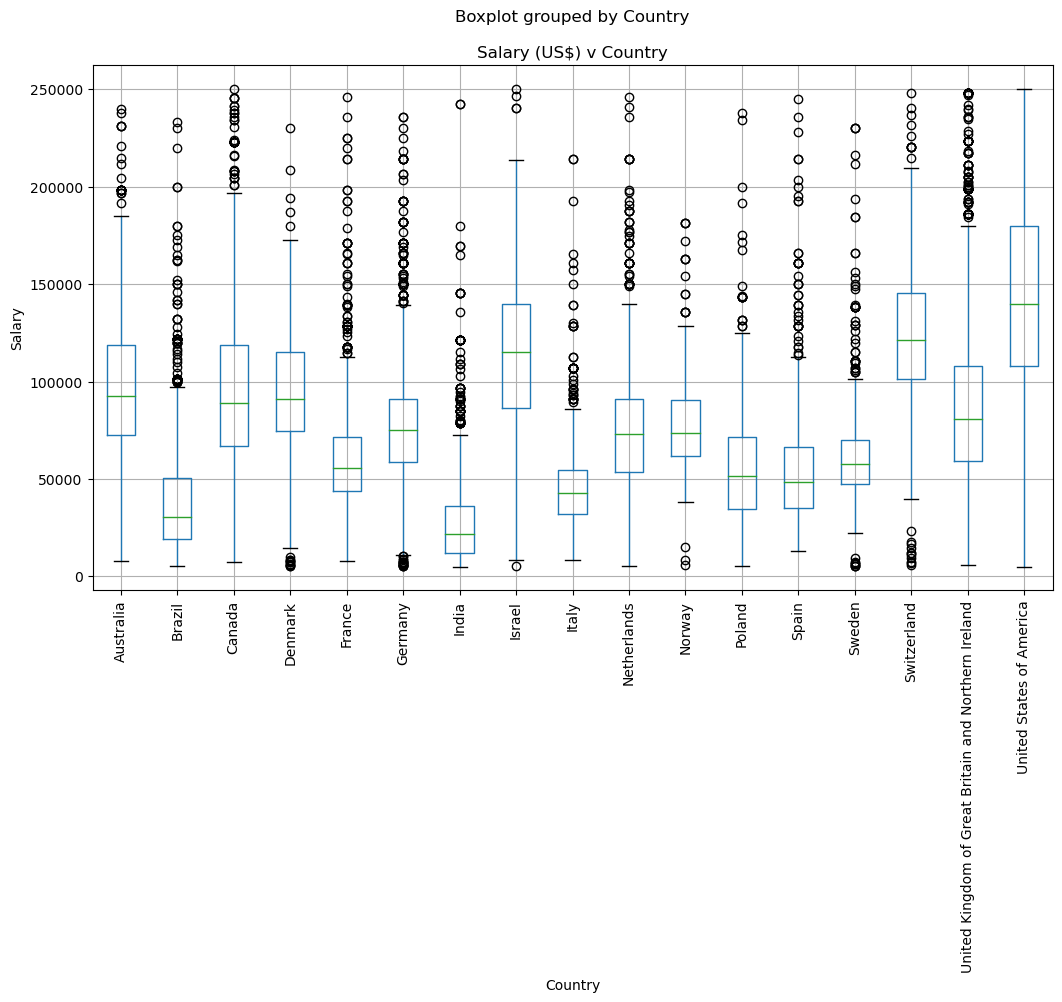

In [276]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (US$) v Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28114 entries, 2 to 89170
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       28114 non-null  object 
 1   EdLevel       28114 non-null  object 
 2   YearsCodePro  28114 non-null  object 
 3   DevType       28114 non-null  object 
 4   Salary        28114 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [278]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '1', '38', '33', '29',
       '22', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

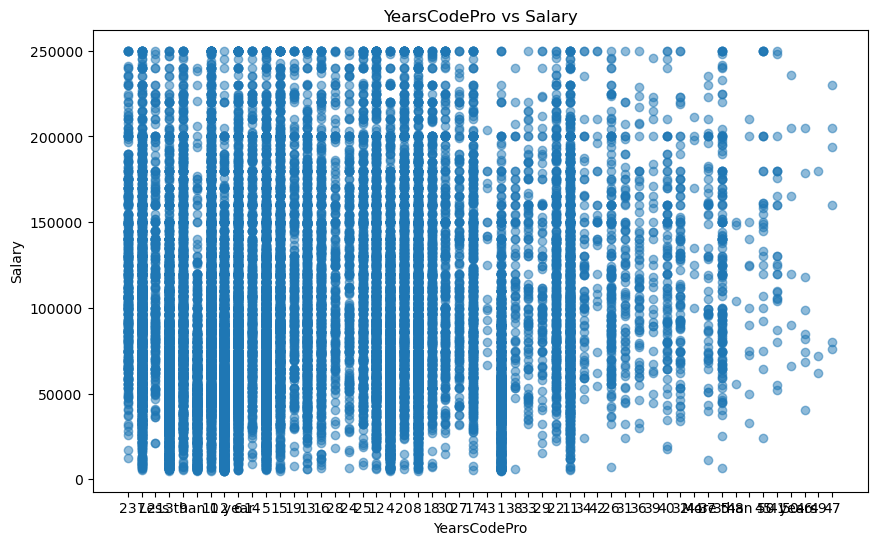

In [279]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCodePro'], df['Salary'], alpha=0.5)
plt.title('YearsCodePro vs Salary')
plt.xlabel('YearsCodePro')
plt.ylabel('Salary')
plt.show()

In [280]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

Konversi "Less than 1 year" dan "More than 50 years" menjadi tipe data float

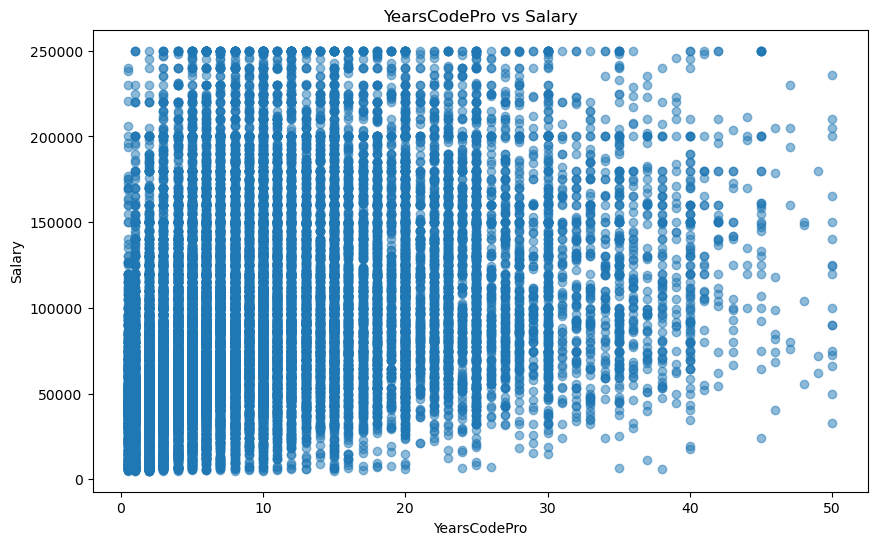

In [281]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCodePro'], df['Salary'], alpha=0.5)
plt.title('YearsCodePro vs Salary')
plt.xlabel('YearsCodePro')
plt.ylabel('Salary')
plt.show()

In [282]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

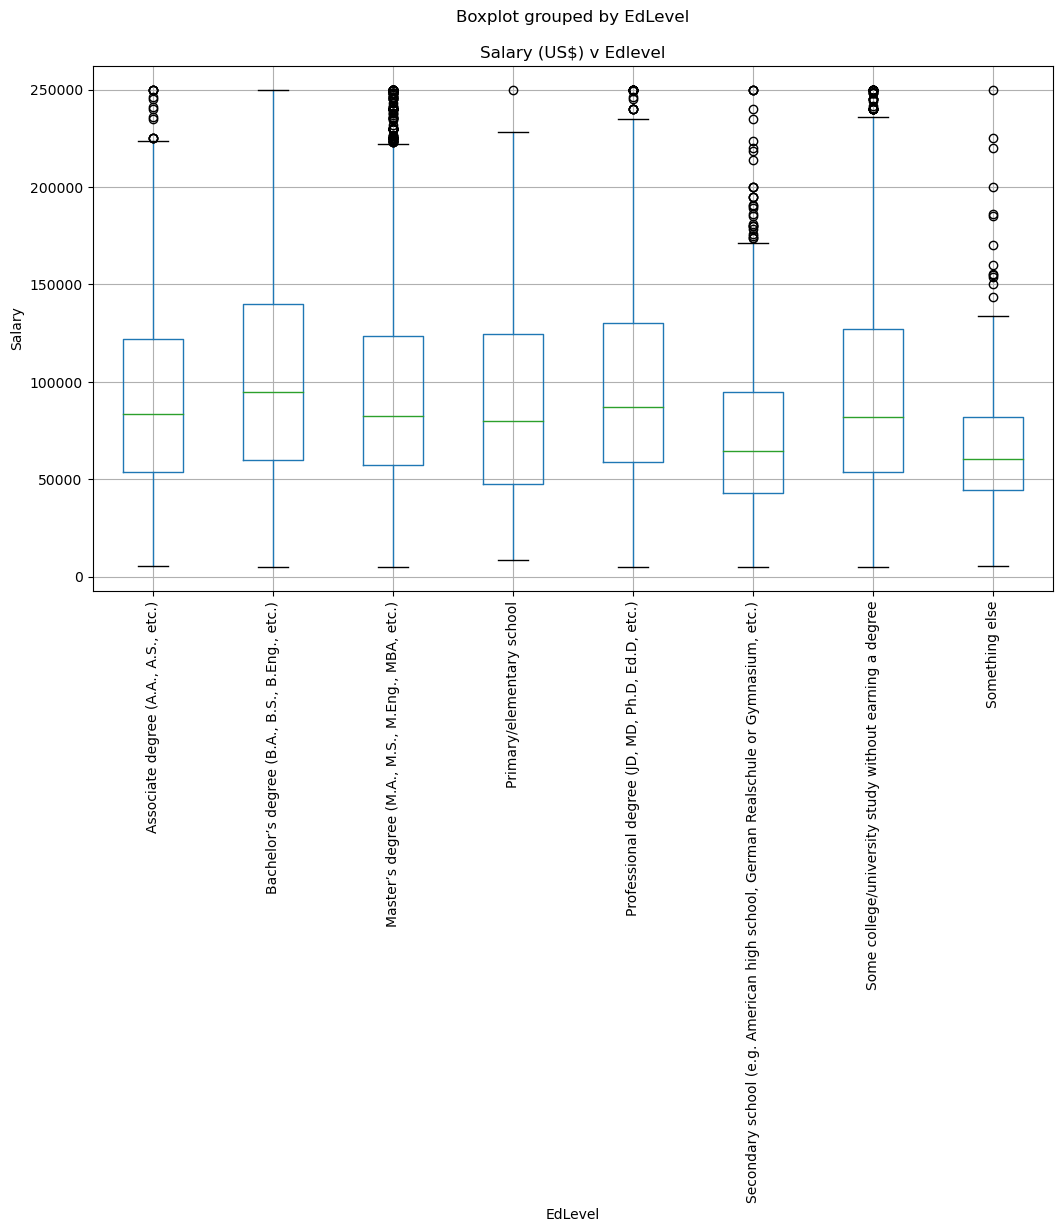

In [283]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'EdLevel', ax=ax)
plt.title('Salary (US$) v Edlevel')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [284]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Sarjana'
    if 'Master’s degree' in x:
        return 'Magister'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Pasca sarjana'
    return 'Di bawah sarjana'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

Menggabungkan beberapa kategori tingkat pendidikan menjadi kategori Sarjana, Magister, Pasca sarjana, dan Di bawah sarjana

In [285]:
df["EdLevel"].unique()

array(['Sarjana', 'Di bawah sarjana', 'Magister', 'Pasca sarjana'],
      dtype=object)

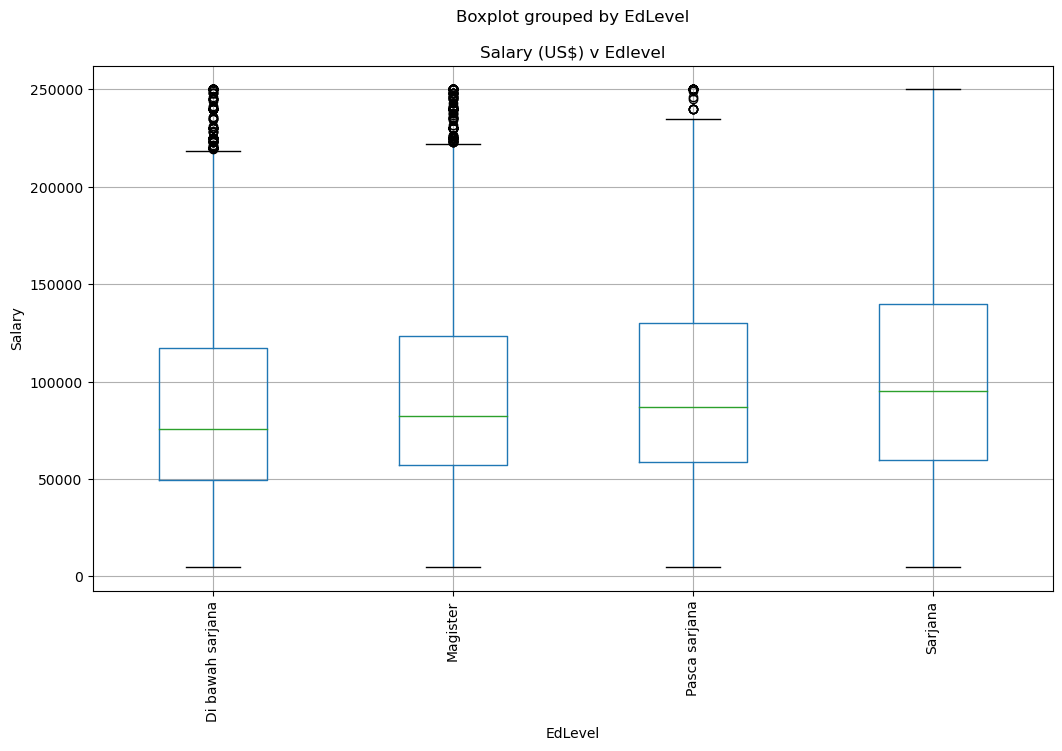

In [286]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'EdLevel', ax=ax)
plt.title('Salary (US$) v Edlevel')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [287]:
df["DevType"].unique()

array(['Developer, back-end', 'Developer, front-end',
       'Developer, full-stack', 'Developer, QA or test',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'System administrator',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Database administrator',
       'Developer, embedded applications or devices',
       'Other (please specify):', 'Cloud infrastructure engineer',
       'Developer, mobile', 'DevOps specialist', 'Engineering manager',
       'Senior Executive (C-Suite, VP, etc.)', 'Project manager',
       'Academic researcher', 'Product manager',
       'Engineer, site reliability', 'Developer, game or graphics',
       'Developer Advocate', 'Hardware Engineer', 'Educator', 'Scientist',
       'Developer Experience', 'Marketing or sales professional',
       'Designer', 'Blockchain', 'Student'], dtype=object)

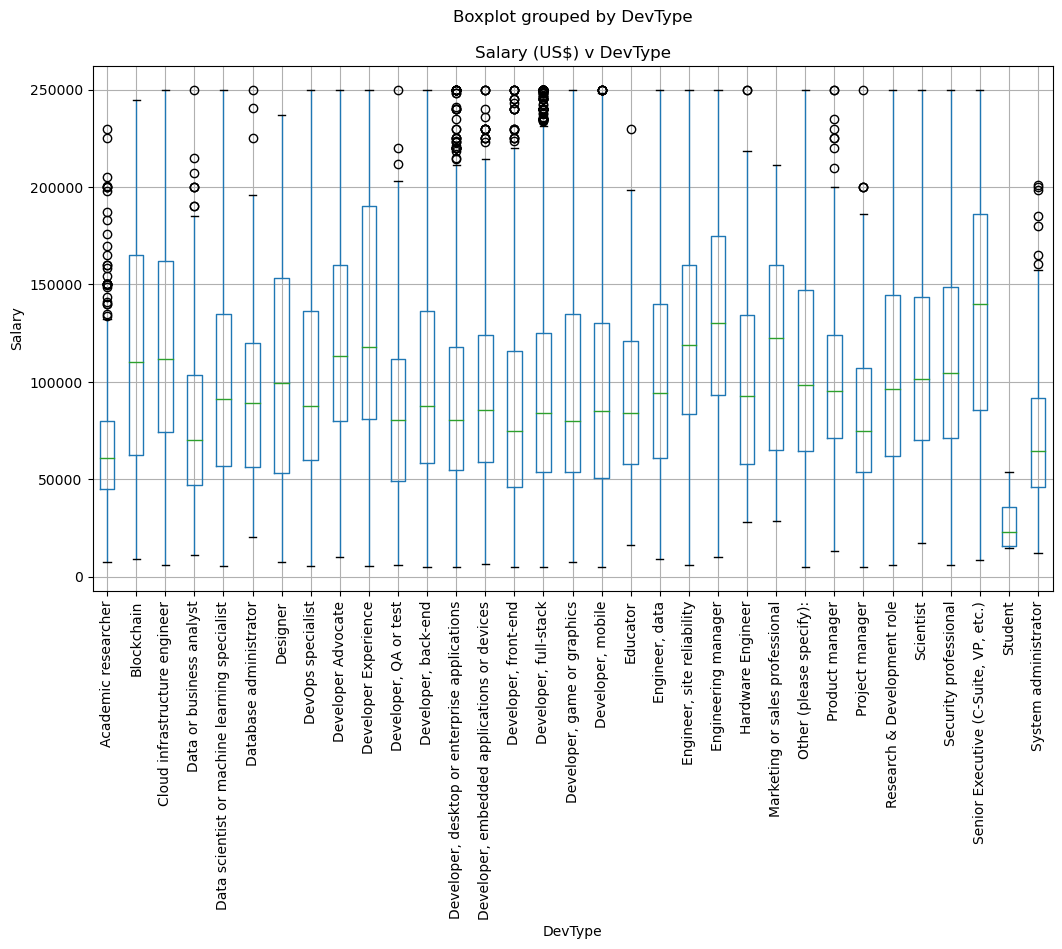

In [288]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'DevType', ax=ax)
plt.title('Salary (US$) v DevType')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [289]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            9951
Developer, back-end                              5544
Developer, front-end                             1755
Developer, desktop or enterprise applications    1491
Other (please specify):                           895
Developer, embedded applications or devices       863
Engineering manager                               844
Developer, mobile                                 821
DevOps specialist                                 616
Data scientist or machine learning specialist     611
Engineer, data                                    598
Research & Development role                       531
Cloud infrastructure engineer                     504
Academic researcher                               423
Senior Executive (C-Suite, VP, etc.)              374
Data or business analyst                          285
Developer, game or graphics                       266
Developer, QA or test                             205
Engineer, site relia

In [290]:
DevType_map = shorten_categories(df.DevType.value_counts(), 265)
df['DevType'] = df['DevType'].map(DevType_map)
df.DevType.value_counts()

DevType
Developer, full-stack                            9951
Developer, back-end                              5544
Developer, front-end                             1755
Other                                            1742
Developer, desktop or enterprise applications    1491
Other (please specify):                           895
Developer, embedded applications or devices       863
Engineering manager                               844
Developer, mobile                                 821
DevOps specialist                                 616
Data scientist or machine learning specialist     611
Engineer, data                                    598
Research & Development role                       531
Cloud infrastructure engineer                     504
Academic researcher                               423
Senior Executive (C-Suite, VP, etc.)              374
Data or business analyst                          285
Developer, game or graphics                       266
Name: count, dtype: 

Hapus semua data yang berasal dari jenis developer yang hanya memiliki sedikit data karena jika misalnya kita menggunakan data yang jumlahnya hanya sedikit. Jika jumlah data lebih besar atau sama dengan nilai cutoff(265), maka data dari jenis developer tersebut dipertahankan. Jika kurang, data tersebut digabungkan ke kategori baru yaitu "Other"

In [291]:
df = df[df['DevType'] != 'Other']
df = df[df['DevType'] != 'Other (please specify):']

Drop jenis developer 'Other' dan 'Other (please specify):' agar model dapat mempelajari model dengan lebih baik

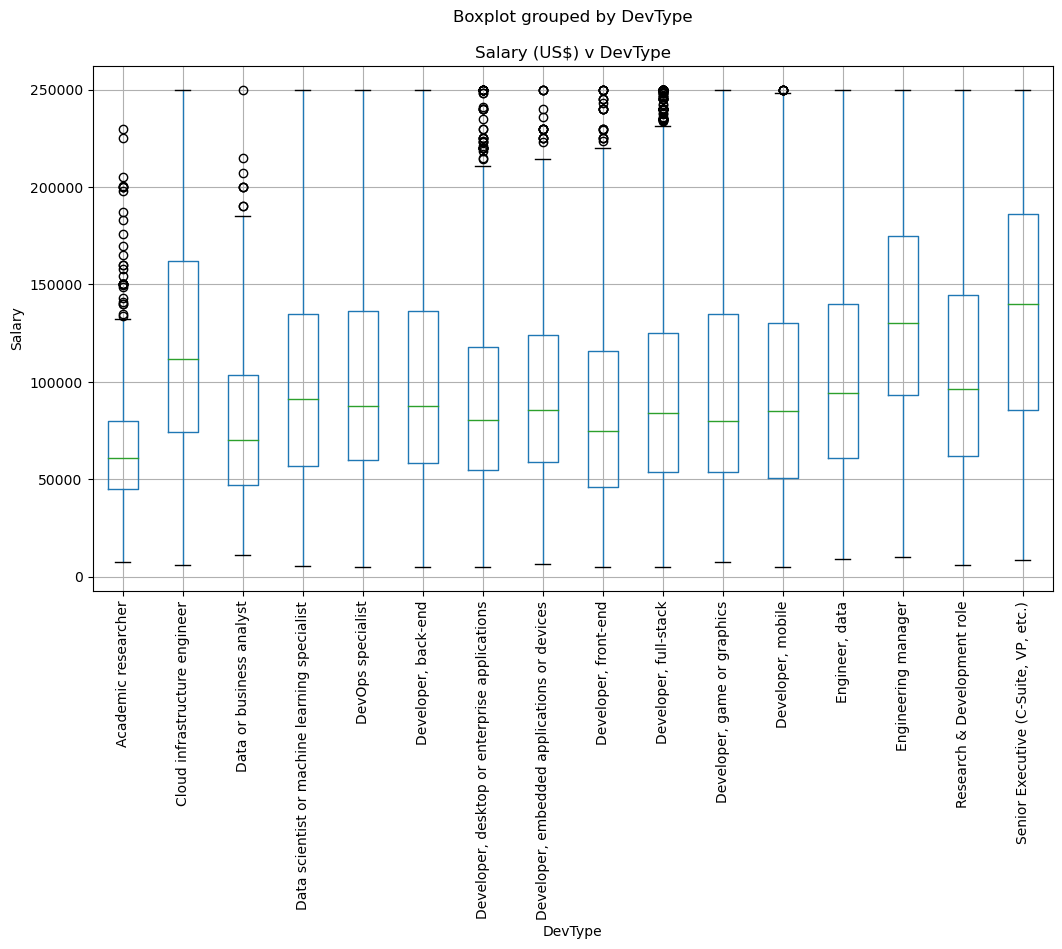

In [292]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'DevType', ax=ax)
plt.title('Salary (US$) v DevType')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25477 entries, 2 to 89167
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       25477 non-null  object 
 1   EdLevel       25477 non-null  object 
 2   YearsCodePro  25477 non-null  float64
 3   DevType       25477 non-null  object 
 4   Salary        25477 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [294]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([3, 0, 1, 2])

In [295]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

In [296]:
le_devtype = LabelEncoder()
df['DevType'] = le_devtype.fit_transform(df['DevType'])
df["DevType"].unique()

array([ 5,  8,  9,  3,  2, 14,  6, 12,  7,  1, 11,  4, 13, 15,  0, 10])

Karena Country, EdLevel, dan DevType merupakan data string, ubah ke nilai unik agar bisa dipahami oleh model

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25477 entries, 2 to 89167
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       25477 non-null  int32  
 1   EdLevel       25477 non-null  int32  
 2   YearsCodePro  25477 non-null  float64
 3   DevType       25477 non-null  int32  
 4   Salary        25477 non-null  float64
dtypes: float64(2), int32(3)
memory usage: 895.7 KB


In [298]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

Split data menjadi features(Country, EdLevel, YearsCodePro, DevType (x)) dan label(Salary (y))

In [299]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [300]:
y_pred = linear_reg.predict(X)

Train model menggunakan LinearRegression

In [301]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = np.abs(mean_absolute_error(y, y_pred))
print("MAE = ${:,.02f}".format(mae))

MAE = $36,315.13


Evaluasi performa model menggunakan Mean Absolute Error (MAE)

In [302]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [303]:
y_pred = random_forest_reg.predict(X)

Train model menggunakan Random Forest Regressor

In [304]:
mae = np.abs(mean_absolute_error(y, y_pred))
print("MAE = ${:,.02f}".format(mae))

MAE = $19,695.64


Evaluasi performa model menggunakan Mean Absolute Error (MAE)

In [305]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_reg = GradientBoostingRegressor(random_state=0)

grad_boost_reg.fit(X, y.values)

GradientBoostingRegressor(random_state=0)

In [306]:
y_pred = grad_boost_reg.predict(X)

Train model menggunakan Gradient Boosting Regressor

In [308]:
mae = np.abs(mean_absolute_error(y, y_pred))
print("MAE = ${:,.02f}".format(mae))

MAE = $24,762.60


Evaluasi performa model menggunakan Mean Absolute Error (MAE)

In [309]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [310]:
y_pred = dec_tree_reg.predict(X)

Train model menggunakan Decision Tree Regressor

In [311]:
mae = np.abs(mean_absolute_error(y, y_pred))
print("MAE = ${:,.02f}".format(mae))

MAE = $17,880.92


In [312]:
X

,Country,EdLevel,YearsCodePro,DevType
2,16,3,23.0,5
3,16,3,7.0,8
5,15,0,21.0,5
6,16,0,3.0,9
7,16,3,3.0,9
...,...,...,...,...
89155,2,0,0.5,9
89156,16,3,8.0,13
89158,13,3,8.0,8
89162,1,1,24.0,5


In [314]:
# Country, EdLevel, YearsCodePro, DevType
X = np.array([['United States of America', 'Magister', 15, 'Developer, full-stack' ]])
X

array([['United States of America', 'Magister', '15',
        'Developer, full-stack']], dtype='<U24')

Contoh array input dari user untuk diprediksi

In [315]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X[:, 3] = le_devtype.transform(X[:,3])
X = X.astype(float)
X

array([[16.,  1., 15.,  9.]])

Menerapkan label encoder ke Country agar menjadi kolom ke 0, EdLevel menjadi kolom ke 1, dan DevType menjadi kolom ke 3

In [316]:
y_pred = dec_tree_reg.predict(X)
y_pred

C:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([169520.125])

X dimasuukkan ke dalam regressor dan dilakukan prediksi

In [317]:
import pickle

In [318]:
data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education, "le_devtype": le_devtype}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

Menyimpan model (Decision Tree Regressor) ke direktori menggunakan pickle

In [319]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

dec_tree_reg_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_devtype = data["le_devtype"]

Membuka model yang sudah disimpan di direktori

In [320]:
y_pred = dec_tree_reg_loaded.predict(X)
y_pred

C:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([169520.125])

Melakukan prediksi menggunakan model yang dimuat dari direktori dan menghasilkan nilai yang sama